# Make convective region mask

In [1]:
import xarray as xr

In [2]:
def conv_box(da, vert=True):
    da_region = da.where((da.TLAT >= -69) & (da.TLAT <= -64) & ((da.TLONG >= 354) | (da.TLONG <= 19)), drop=True)
    if vert == True:
        return da_region.isel(z_t=slice(0, 5)).load()
    else: return da_region.load()

In [3]:
mld_ds = xr.open_dataset('/glade/derecho/scratch/rford2/ihesp-gn/HRCESM-CRB-HMXL-full.nc')

In [4]:
mld = (mld_ds.HMXL/100).squeeze()

In [5]:
mld

<xarray.DataArray 'HMXL' (time: 3240, nlat: 118, nlon: 250)> Size: 382MB
array([[[ 18.074987 ,  17.835863 ,  18.490599 , ...,  15.229145 ,
          15.176255 ,  15.116193 ],
        [ 18.323347 ,  18.070972 ,  18.757078 , ...,  14.86084  ,
          14.9715805,  15.059457 ],
        [ 18.844137 ,  19.002752 ,  18.84843  , ...,  14.509901 ,
          14.643063 ,  14.773273 ],
        ...,
        [ 26.619892 ,  26.887379 ,  26.5348   , ...,  28.924946 ,
          28.95824  ,  28.96573  ],
        [ 26.626867 ,  26.743397 ,  26.389675 , ...,  29.243576 ,
          29.299616 ,  29.303478 ],
        [ 26.41512  ,  26.647322 ,  26.49482  , ...,  29.510674 ,
          29.567371 ,  29.547564 ]],

       [[ 15.309462 ,  14.925219 ,  14.766305 , ...,  25.183819 ,
          24.295311 ,  23.399763 ],
        [ 15.296198 ,  14.993399 ,  14.789202 , ...,  24.079329 ,
          23.365768 ,  23.018234 ],
        [ 15.223572 ,  15.057181 ,  14.974025 , ...,  23.296684 ,
          23.130587 ,  23.078432 ],
...
        [ 89.30726  ,  91.430664 ,  94.54523  , ..., 100.26138  ,
         107.02107  , 103.0378   ],
        [ 88.180466 ,  89.71686  ,  91.98499  , ...,  96.81359  ,
          98.71683  , 105.34305  ],
        [ 87.988655 ,  90.2389   ,  91.94968  , ..., 102.62407  ,
          98.90908  , 106.40427  ]],

       [[ 27.613209 ,  27.360231 ,  27.249414 , ...,  26.418003 ,
          26.309547 ,  31.782228 ],
        [ 28.830996 ,  27.955706 ,  27.99124  , ...,  24.662025 ,
          28.655184 ,  30.395985 ],
        [ 31.6736   ,  29.887306 ,  28.913391 , ...,  28.371058 ,
          29.052284 ,  33.300926 ],
        ...,
        [ 17.16718  ,  16.893074 ,  16.43948  , ...,  19.261642 ,
          19.292522 ,  19.350002 ],
        [ 17.37885  ,  17.051394 ,  17.010502 , ...,  19.315344 ,
          19.331444 ,  19.389719 ],
        [ 17.705498 ,  17.010303 ,  17.290129 , ...,  19.369715 ,
          19.382273 ,  19.432209 ]]], dtype=float32)
Coordinates:
    ULONG    (nlat, nlon) float64 236kB ...
    ULAT     (nlat, nlon) float64 236kB ...
    TLONG    (nlat, nlon) float64 236kB ...
    TLAT     (nlat, nlon) float64 236kB ...
  * time     (time) object 26kB 0250-02-01 00:00:00 ... 0520-01-01 00:00:00
Dimensions without coordinates: nlat, nlon

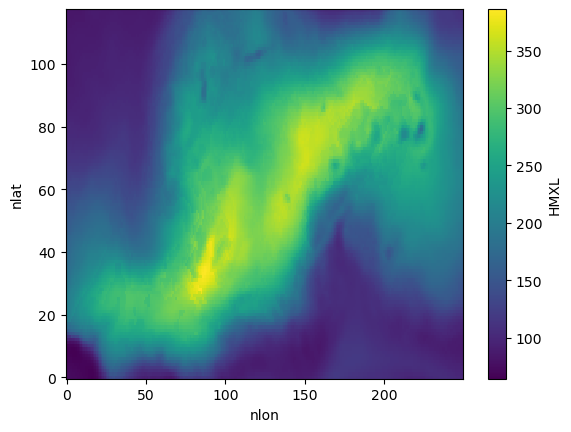

In [6]:
mld.mean(dim='time').plot()

In [7]:
conv_region = xr.where(mld.sel(time=slice('0338-02', None)).mean(dim='time') >= 250, True, False)

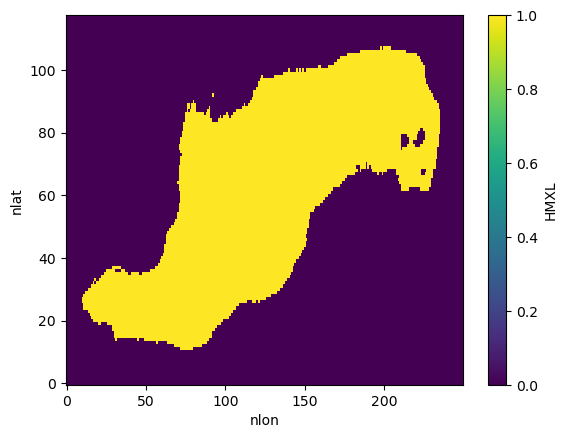

In [10]:
conv_region.plot()

In [9]:
# conv_region.to_dataset(name='conv_region').to_netcdf('HRCESM-CRMASK2.nc')